<a href="https://colab.research.google.com/github/pvzinn/bd-2022-1-bia/blob/main/Test1_VC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# 1- Elabore uma função para estimar sinais i1D e sua confiança respectiva (R²)

In [5]:
image = cv2.imread("casa.jpg")

def find_edges(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
  
  edges = cv2.Canny(img_blur, 100, 200)

  cv2_imshow(edges)

  return edges

  #Utilizando o método de detecção de bordas de Canny, a função identifica os "edges" da imagem

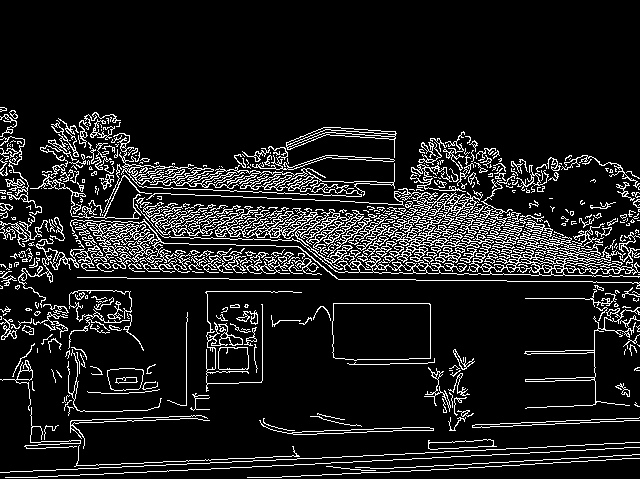

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
find_edges(image)

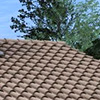

In [7]:
roi = image[150:250, 400:500] #selecione um ROI
cv2_imshow(roi)

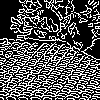

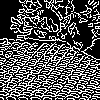

In [8]:
roi_edges = find_edges(roi)
pixels = np.transpose(np.nonzero(roi_edges))

cv2_imshow(roi_edges)


In [9]:
H, W = roi_edges.shape
mask = roi_edges == 255

x = np.arange(H)
y = np.arange(W)



In [10]:
xg, yg = np.meshgrid(x, y)
img_count = np.zeros((H, W, 2))


img_count[:,:,0] = xg
img_count[:,:,1] = yg

pts = img_count[mask]

x1 = pts[:,0]
y1 = pts[:,1]

#pts

In [11]:
def pinv(A): #Obter a inversa da matriz A

  AT = np.linalg.inv((A.T)@A)@(A.T)
  return AT

In [12]:
A = np.vstack((x1, np.ones(len(x1)))).T

In [13]:
AT = pinv(A)

In [14]:
n, b = AT@y1

yn = n * x1 + b

In [15]:
def defineR2(y, y_2): #Função que calcula o indice R2 (confiança)
  res = (y - y_2)
  SSres = res.T @ res

  dot = (y - y.mean())
  SSdot = dot.T @ dot
  
  R2 = 1 - SSres/SSdot
  return R2

In [34]:
R2 = defineR2(y1, yn) * 100
porc = str('%')
print("O índice de confiança R2 é: %f"%R2)

O índice de confiança R2 é: 0.137440


# 2 - Crie uma analise em escala piramidal gaussiana para criar um detector robusto 

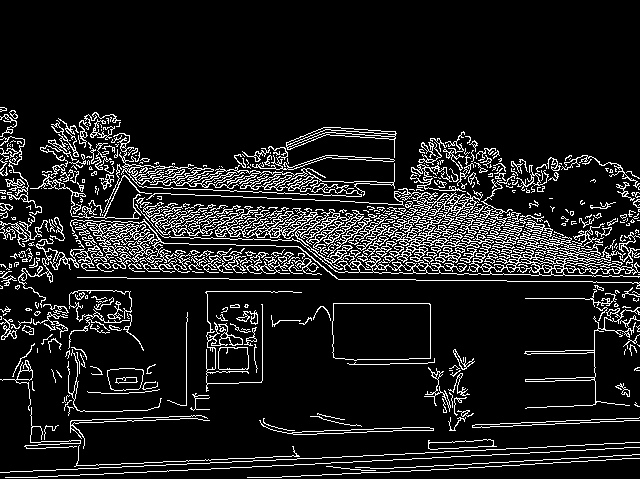

(479, 640, 3)


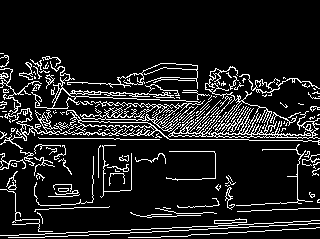

(239, 320, 3)


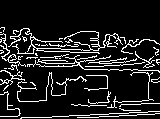

(119, 160, 3)


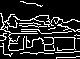

(59, 80, 3)


(29, 40, 3)


(14, 20, 3)


(7, 10, 3)


(3, 5, 3)


In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# carrega a imagem
image = cv2.imread("casa.jpg")

#Define os parâmetros: número de reduções, número de escalas, tamanho do kernel e valor de sigma
num_red = 8 
num_scales = 1
k_size = 7 
sigma = 1.8


piramide = []
for img in range(num_red):
    img_layer = [image]
    for scale in range(1, num_scales):
        img_blur = cv2.GaussianBlur(img_layer[scale - 1], (k_size, k_size), sigma) 
        img_layer.append(img_blur) #aplica o filtro gaussiano
    image = cv2.resize(image, (int(image.shape[1] / 2), int(image.shape[0] / 2))) #reduz as dimensões x e y na metade
    piramide.append(img_layer)
    
for img_layer in piramide:

    for scale_image in img_layer:

        find_edges(scale_image)
        print(scale_image.shape)
         #Aplica a função de "edge detection" para cada uma das imagens
         
        #cv2_imshow(scale_image)
        
        
        




# 3 - A partir do passo anterior, derive uma métrica para para definir a robustez da sua estimativa

In [ ]:
def metric(total_i1D, threshold = 0.75): #Para cada i1D detectado, será verificado se o R2 é maior que o threshold

  size = len(total_i1D)
  for l in total_i1D:
    if l[1] > threshold:
      real_i1D =+ 1
    
   
   return sum(real_i1D) / size  #Ao fim, soma todas detecções verdadeiras e compara em relação ao total



# 4 - Baseado no calculo do tensor de estrutura, descreva o procedimento para detecção de cantos de Harris e explique qual é a função da "Resposta de Harris" no processo

O procedimento para detecção de cantos de Harris se baseia em calcular um fator chamado de "corner score", comumente identificado pela letra R. Esse fator é obtido a partir das derivadas parciais do gradiente da imagem, além de um parâmetro k que diz respeito à sensibilidade da detecção de cantos e é definido empiricamente. Ao realizar a derivada parcial da imagem em relação a x e y, o resultado será uma matriz 2x2 para todos os pontos da imagem, a partir dessa matriz de derivadas são tirados os parâmetros  λ₁ e λ₂, que são os autovalores da matriz de derivadas. 
A "Resposta de Harris" (ou o valor de R) é importante à medida que pontos com valor alto de "R" indicam cantos, enquanto valores de "R" baixos indicam bordas ou lugares planos.